<a href="https://colab.research.google.com/github/elenachau/machine-learning/blob/main/red_wine_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Predicting Red Wine Quality**

### **Problem Statement:**

The dataset contains various chemical attributes of red wines, such as acidity, alcohol content, and pH, along with a quality rating. Your task is to build a machine learning model to predict the quality of red wines based on their chemical attributes.

### **Dataset Description:**

The dataset contains the following attributes:

* `Fixed Acidity`: The amount of tartaric acid in the wine (g/dm³).
* `Volatile Acidity`: The amount of acetic acid in the wine (g/dm³).
* `Citric Acid`: The amount of citric acid in the wine (g/dm³).
* `Residual Sugar`: The amount of residual sugar in the wine (g/dm³).
* `Chlorides`: The amount of chlorides in the wine (g/dm³).
* `Free Sulfur Dioxide`: The amount of free sulfur dioxide (mg/dm³).
* `Total Sulfur Dioxide`: The total amount of sulfur dioxide (mg/dm³).
* `Density`: The density of the wine (g/cm³).
* `pH`: The pH of the wine.
* `Sulphates`: The amount of sulphates in the wine (g/dm³).
* `Alcohol`: The alcohol content of the wine (%).
* `Quality`: The quality rating of the wine (on a scale from 3 to 8, with higher values indicating better quality).

### **Expectations:**

- Data preprocessing steps.
- EDA findings, including visualizations.
- Data splitting
- Model selection, training, and evaluation details.
- Model performance metrics and insights.
- Conclusion and recommendations.



#### **Data Download**

In [1]:
!wget https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv

--2024-02-28 09:09:22--  https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100951 (99K) [text/plain]
Saving to: ‘winequality-red.csv’

winequality-red.csv 100%[===================>]  98.58K  --.-KB/s    in 0.02s   

2024-02-28 09:09:22 (5.03 MB/s) - ‘winequality-red.csv’ saved [100951/100951]



#### **Data preprocessing steps**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
from math import sqrt
import seaborn as sns

In [3]:
df = pd.read_csv('winequality-red.csv')

In [4]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [5]:
df.info() #check for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe() #check for data deviation

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [7]:
df.drop_duplicates(subset=None, inplace=True)
df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
5               7.4             0.660         0.00             1.8      0.075   
...             ...               ...          ...             ...        ...   
1593            6.8             0.620         0.08             1.9      0.068   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    11.0                  34.0  0.99780  3.51       0.56   
1                    25.0                  67.0  0.99680  3.20       0.68   
2                    15.0                  54.0  0.99700  3.26       0.65   
3                    17.0                  60.0  0.99800  3.16       0.58   
5                    13.0                  40.0  0.99780  3.51       0.56   
...                   ...                   ...      ...   ...        ...   
1593                 28.0                  38.0  0.99651  3.42       0.82   
1594                 32.0                  44.0  0.99490  3.45       0.58   
1595                 39.0                  51.0  0.99512  3.52       0.76   
1597                 32.0                  44.0  0.99547  3.57       0.71   
1598                 18.0                  42.0  0.99549  3.39       0.66   

      alcohol  quality  
0         9.4        5  
1         9.8        5  
2         9.8        5  
3         9.8        6  
5         9.4        5  
...       ...      ...  
1593      9.5        6  
1594     10.5        5  
1595     11.2        6  
1597     10.2        5  
1598     11.0        6  

[1359 rows x 12 columns]

#### **EDA findings, including visualizations**

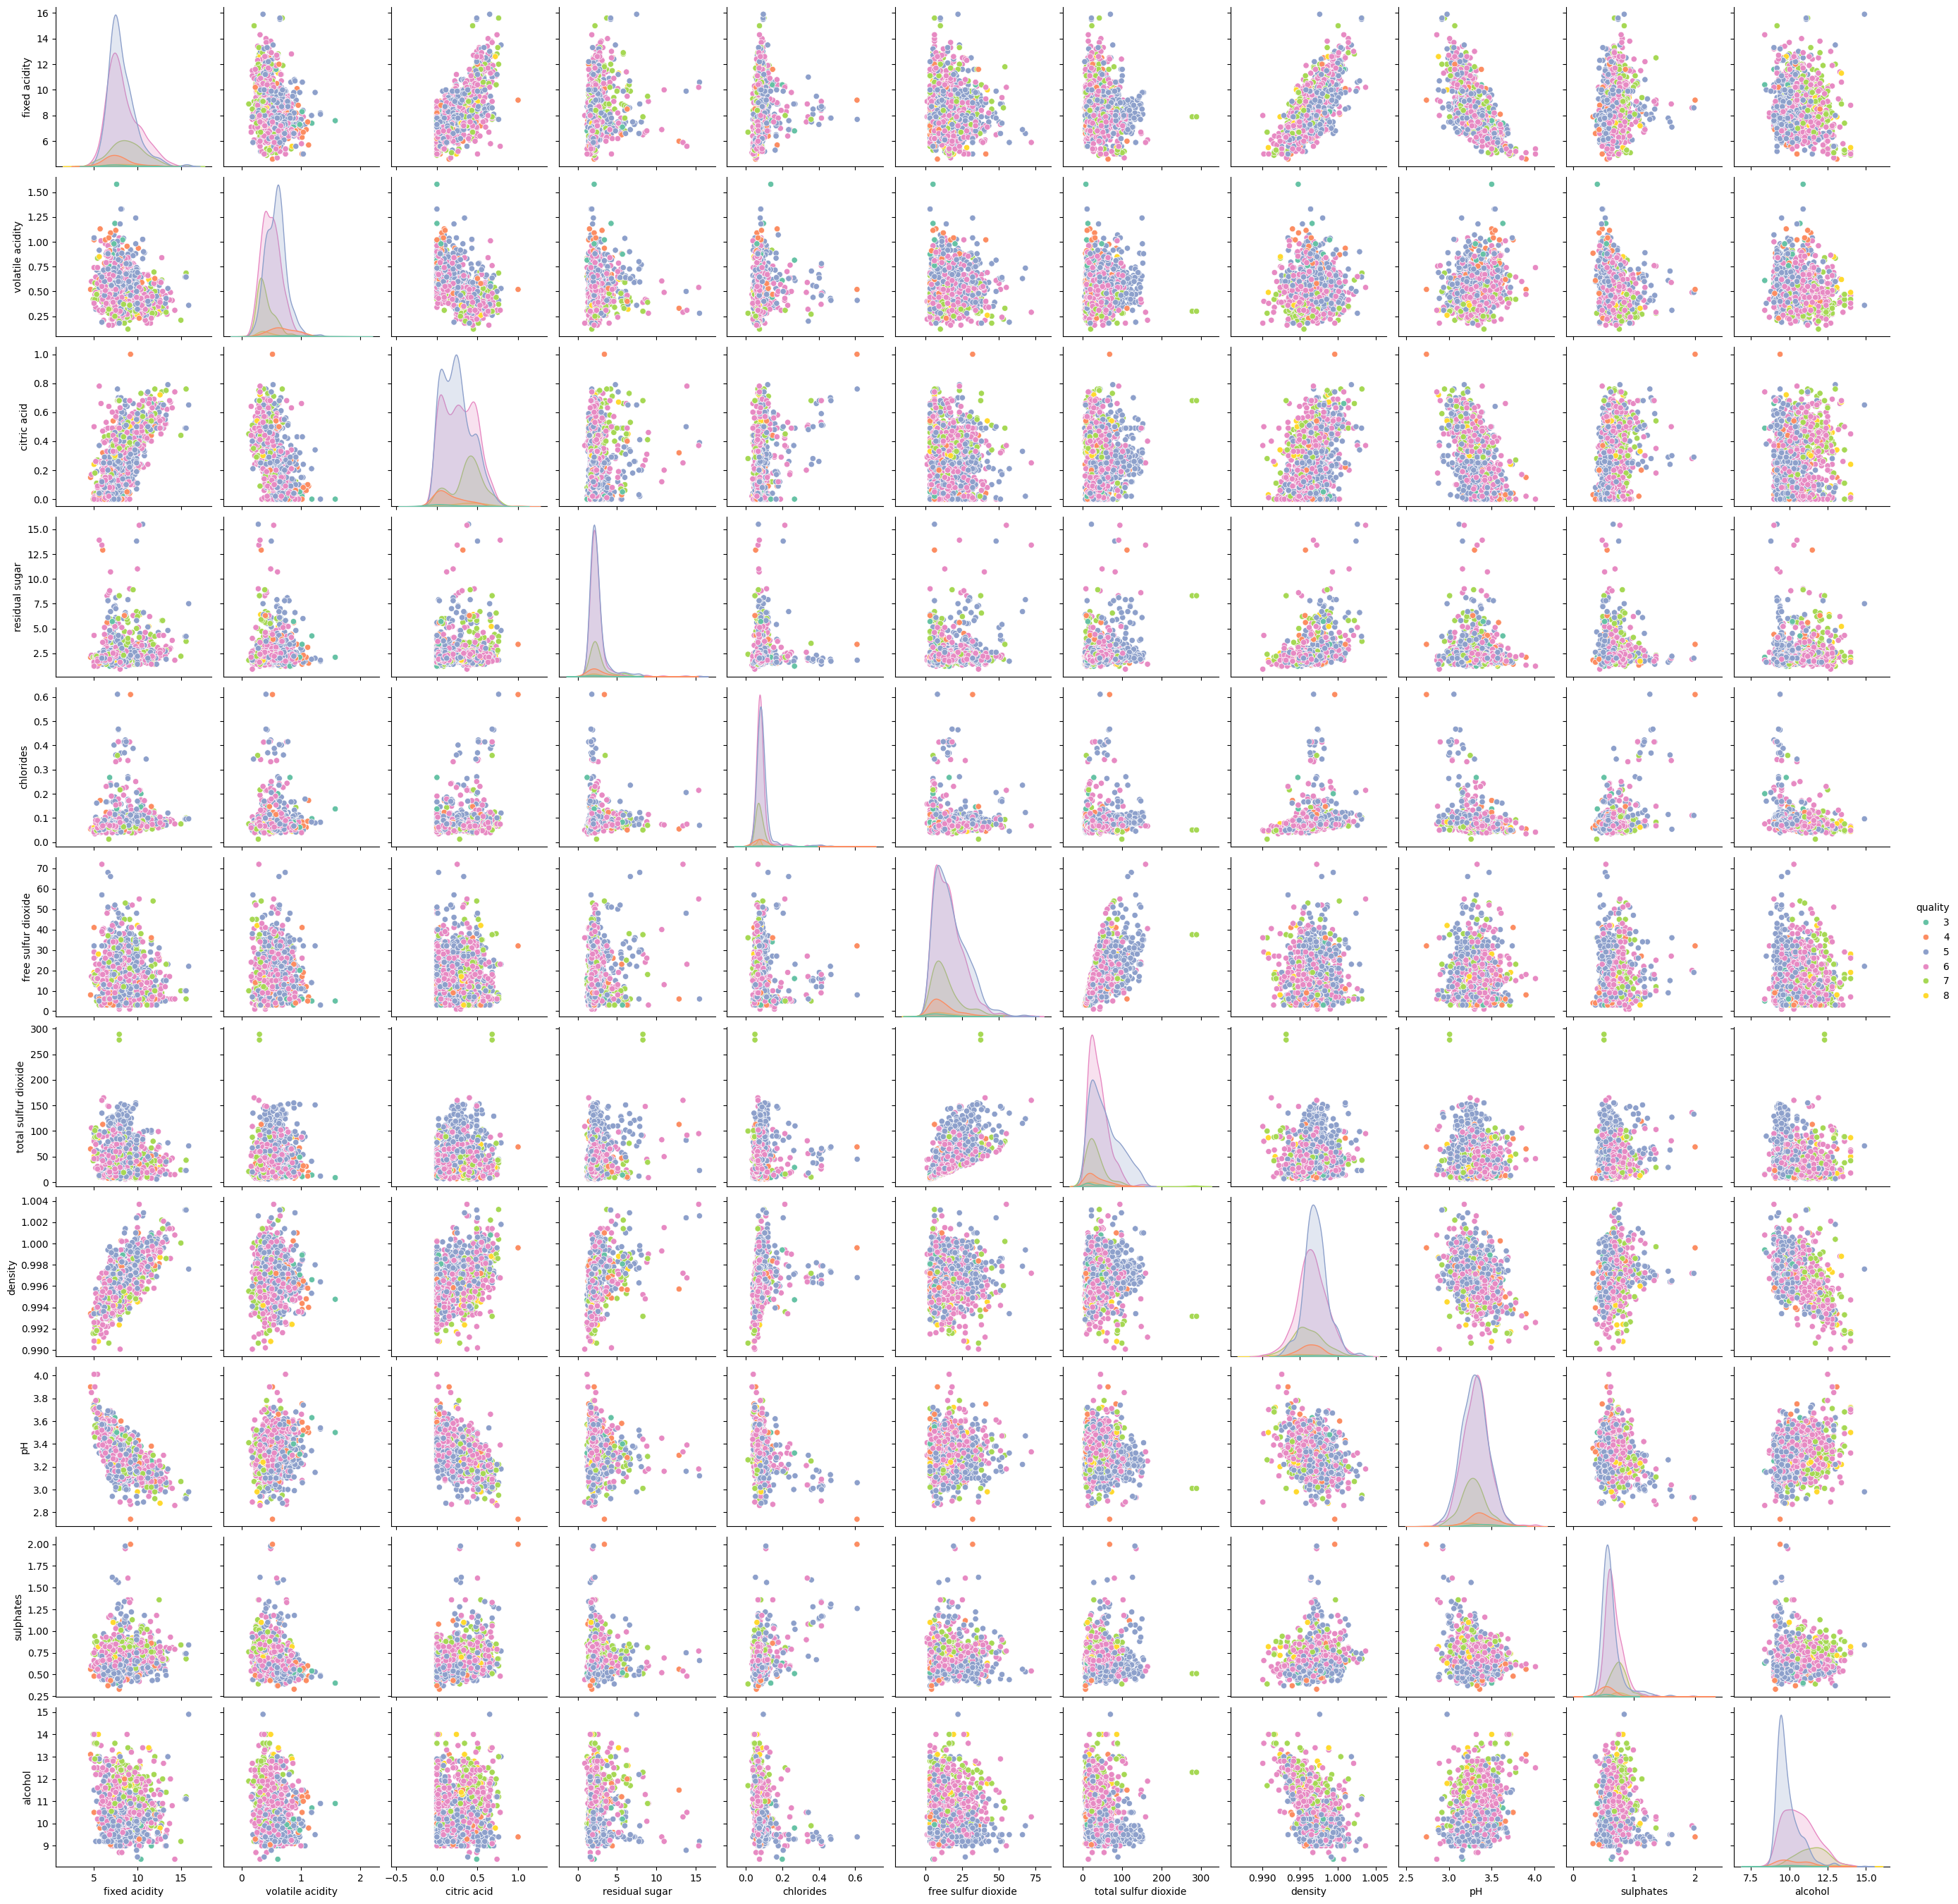

In [8]:
#categorical data
sns.pairplot(df, hue='quality', palette='Set2')
plt.show()

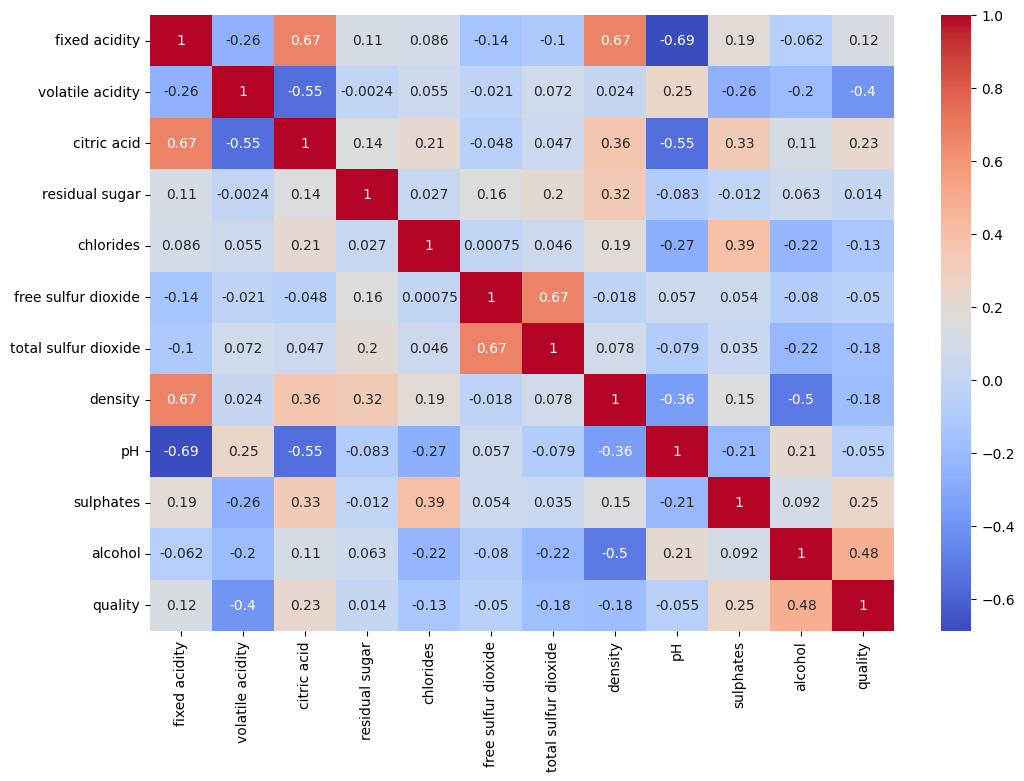

In [9]:
#correlation matrix and heatmap
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<ipython-input-10-c313b3e7beb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')
<ipython-input-10-c313b3e7beb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')
<ipython-input-10-c313b3e7beb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y=col, data=df, palette='Set3')
<ipython-input-10-c313b3e7beb2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `h

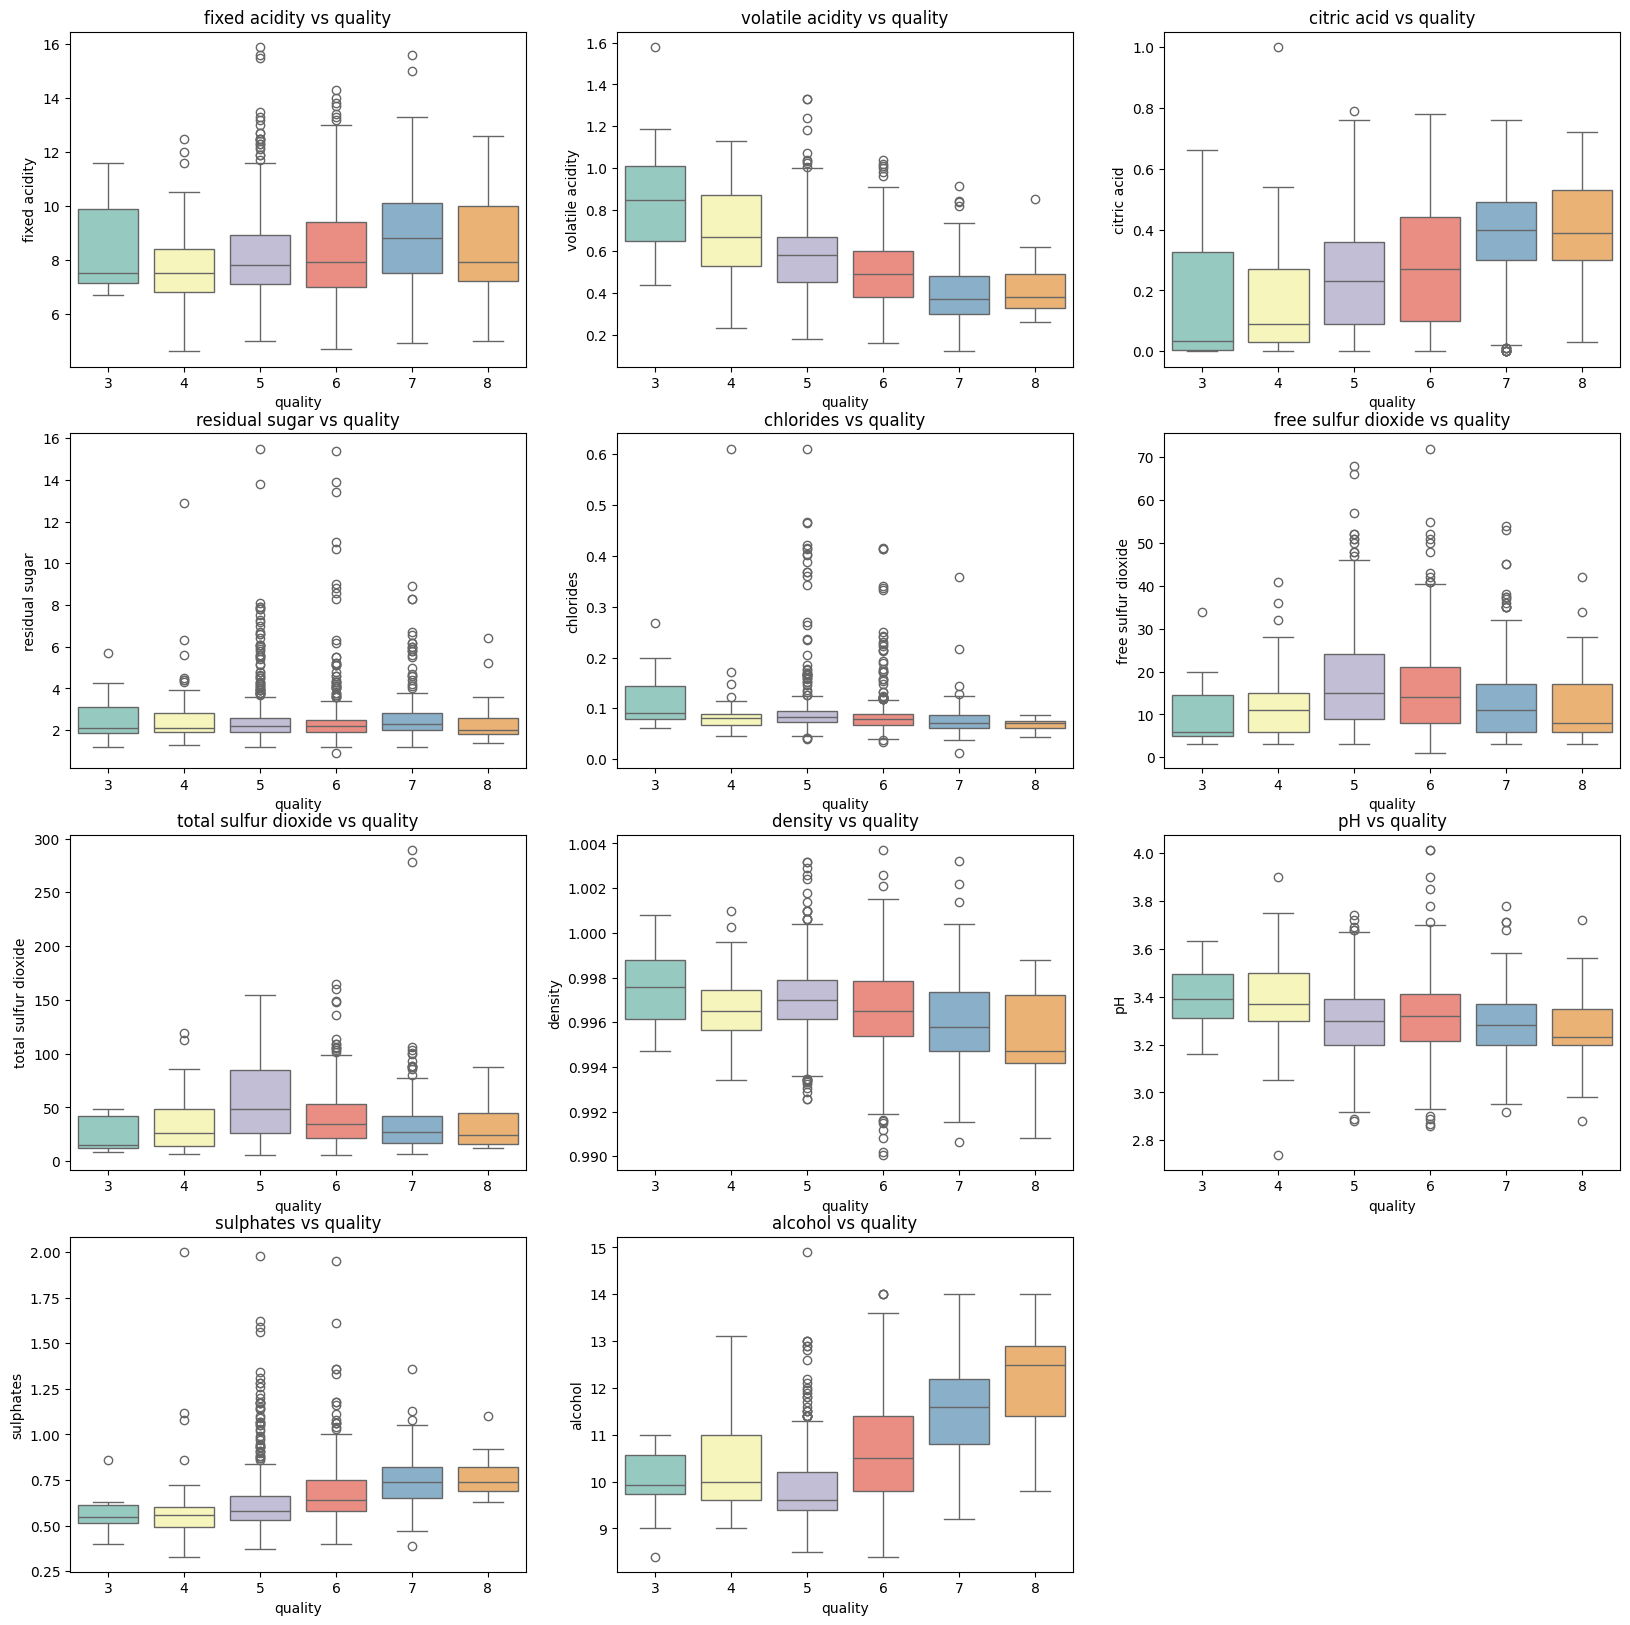

In [10]:
#boxplot for quality vs attributes
plt.figure(figsize=(20,20))
for i, col in enumerate(df.columns[:-1], 1):
  plt.subplot(4, 3, i)
  sns.boxplot(x='quality', y=col, data=df, palette='Set3')
  plt.title(f'{col} vs quality')

#### **Data Splitting**

In [11]:
from sklearn.model_selection import train_test_split

features = df.drop(['quality'], axis=1)
target = df['quality']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)

#### **Model selection, training, and evaluation details**

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

In [13]:
data = pd.concat([pd.DataFrame(y_test.values), pd.DataFrame(y_test_pred)], axis=1)
data.columns = ['actuals', 'predicted']
data['predicted'] = data['predicted'].apply(lambda x: round(x))
data

actuals  predicted
0          5          5
1          6          6
2          7          6
3          5          5
4          4          5
..       ...        ...
335        5          5
336        6          6
337        6          6
338        7          6
339        6          6

[340 rows x 2 columns]

#### **Model performance metrics and insights**

In [14]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape

print(f"Train error: {round(sqrt(mse(y_train, y_train_pred)), 3)}")
print(f"Test error: {round(sqrt(mse(y_test, y_test_pred)), 3)}")

Train error: 0.665
Test error: 0.638


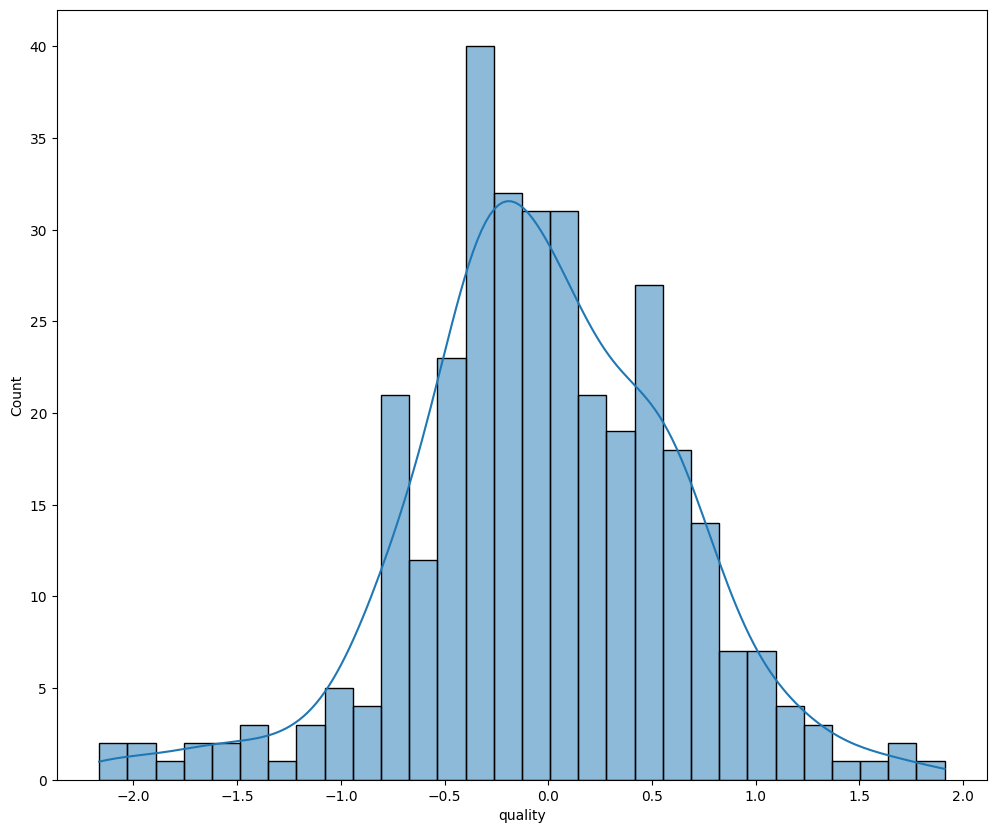

In [15]:
plt.figure(figsize=(12, 10))
sns.histplot(y_test - y_test_pred, kde=1, bins=30)
plt.show()

In [16]:
print(f"Train MAPE: {round(mape(y_train, y_train_pred), 3)*100}")
print(f"Test MAPE: {round(mape(y_test, y_test_pred), 3)*100}")

Train MAPE: 9.4
Test MAPE: 9.3


In [17]:
from sklearn.metrics import r2_score

print(f"Train r2_score: {round(r2_score(y_train, y_train_pred), 3)}")
print(f"Test r2_score: {round(r2_score(y_test, y_test_pred), 3)}")

Train r2_score: 0.347
Test r2_score: 0.398
